Python notebook for exploratory data analysis of the City of Chicago Parking Ticket Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import datetime

In [2]:
# read the dataframe
df_CCPT = pd.read_csv('../data/parking_tickets_frac.csv')

In [3]:
df_CCPT.head(5)

,Unnamed: 0,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,...,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
0,19727593,9185717028,2014-08-05 21:26:00,1852 N MAUD,1e55730db26522e18e6cc4e37db1d5e49a1e9740ef56b5...,MI,PAS,NaN,0964090E,RESIDENTIAL PERMIT PARKING,...,150,0.0,75.0,Paid,2014-08-18 00:00:00,NaN,NaN,0,1432,"1800 n maud, chicago, il"
1,19367998,64352592,2014-06-14 09:41:00,4057 N SUNNYSIDE,e2ceaa3ed4fba9fa9ddeb146a1218c43eedac433ebacef...,IL,PAS,605212454,0964040B,STREET CLEANING,...,120,0.0,60.0,Paid,2014-08-23 00:00:00,NaN,NaN,5181940070,18937,"4000 n sunnyside, chicago, il"
2,5681589,9177655732,2009-01-07 19:56:00,3324 N HALSTED ST,c822dc8d016c735a2d95f33cd9fda4c89519c7aa8c1073...,IL,PAS,606473722,0964200B,PARK OUTSIDE METERED SPACE,...,100,0.0,50.0,Paid,2009-02-05 00:00:00,VIOL,NaN,5105450510,1030,"3300 n halsted st, chicago, il"
3,22647956,9188902856,2015-10-24 14:55:00,1953 N LACROSSE AV,0dc52cb43957b09dfc5514e2080d5c1e2a8de3747fe144...,IL,PAS,606512031,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,...,100,0.0,50.0,Paid,2015-10-29 00:00:00,NaN,NaN,5131145590,1408,"1900 n lacrosse av, chicago, il"
4,1161221,9058219394,2007-05-30 17:27:00,1151 W WAVELAND,c99f5ac386092c0274cc2b247e1a411baf8f3a1587965b...,IL,PAS,600351014,0964090E,RESIDENTIAL PERMIT PARKING,...,100,0.0,50.0,Paid,2007-06-26 00:00:00,VIOL,NaN,5084345240,678,"1100 w waveland, chicago, il"


In [4]:
hd = {'Unique Entry': df_CCPT.nunique(axis = 0),
        'Nan Entry': df_CCPT.isnull().any()}
pd.DataFrame(data = hd, index = df_CCPT.columns.values)

# potential columns to drop: ticket_number,violation_location (since its normalized to address),license_plate_number,
# zipcode, unit, notice_number  

,Unique Entry,Nan Entry
Unnamed: 0,5654516,False
ticket_number,5654516,False
issue_date,2978168,False
violation_location,1461772,False
license_plate_number,3148505,False
license_plate_state,63,True
license_plate_type,152,True
zipcode,752499,True
violation_code,130,False
violation_description,128,False


In [5]:
to_drop = ['Unnamed: 0','ticket_number','violation_location','license_plate_number',
           'zipcode','unit','unit_description','notice_number']
df_CCPT.drop(labels=to_drop ,axis = 1,inplace = True)

In [6]:
row2drop= ['license_plate_state','license_plate_type']
df_CCPT.dropna(axis = 0, how = 'any', subset = row2drop, inplace = True)

In [ ]:
df_CCPT['license_plate_state'].isnull().any()

In [7]:
df_CCPT['issue_date'] = pd.to_datetime(df_CCPT['issue_date'])
df_CCPT['issue_date'].head(5)


0   2014-08-05 21:26:00
1   2014-06-14 09:41:00
2   2009-01-07 19:56:00
3   2015-10-24 14:55:00
4   2007-05-30 17:27:00
Name: issue_date, dtype: datetime64[ns]

In [8]:
# Getting the data from year 2015 to 2017
mask16 = ((df_CCPT['issue_date'] >= pd.Timestamp(2016,1,1,0)) & (df_CCPT['issue_date'] <pd.Timestamp(2018,1,1,0)))
df_CCPT16 = df_CCPT.loc[mask16]

In [9]:
wd = {'weekday': df_CCPT16['issue_date'].dt.weekday,
        'hourofday': df_CCPT16['issue_date'].dt.hour}
df_date = pd.DataFrame(data = wd, index = df_CCPT16.index)

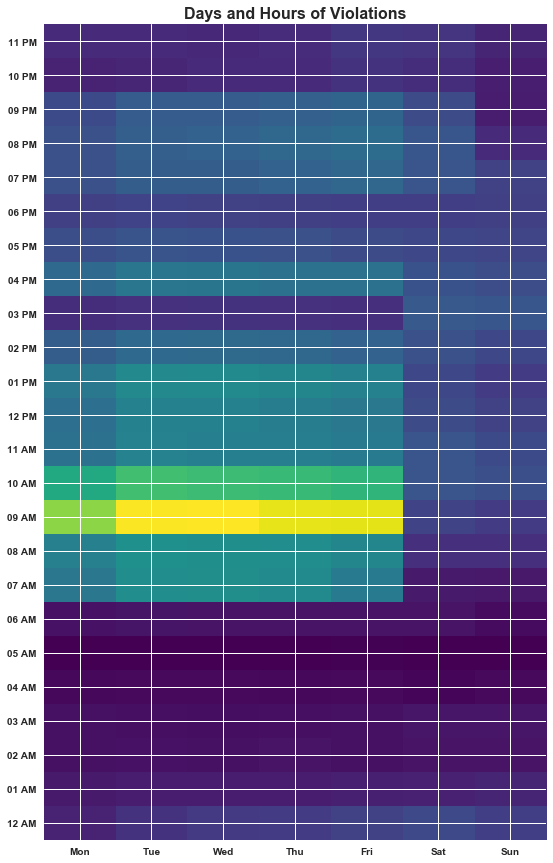

In [11]:
plt.figure(figsize=(9,15))
plt.title('Days and Hours of Violations', fontweight='bold',fontsize = 16);
plt.hist2d(df_date['weekday'],df_date['hourofday'],[np.linspace(-0.5,6.5,num=8),np.linspace(-0.5,23.5,num=25)]);
plt.xticks(np.arange(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontweight='bold');
hours_indx = [(datetime.time(i).strftime('%I %p')) for i in range(24)]
plt.yticks(np.arange(24), hours_indx, fontweight='bold');
plt.set_cmap('viridis')
plt.show()

In [12]:
df_CCPT16['license_plate_state'].value_counts().head(10)

IL    791110
IN     19185
WI     10784
MI      8227
OH      5360
TX      4246
CA      3998
FL      3507
IA      3443
MO      3254
Name: license_plate_state, dtype: int64

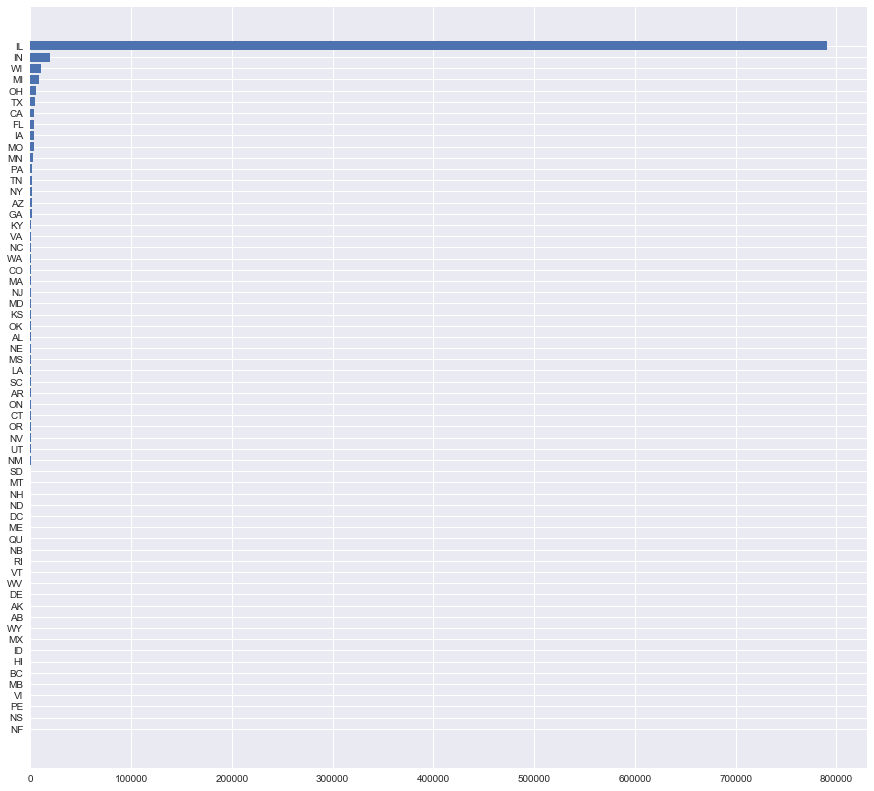

In [13]:
x_ticks = df_CCPT16['license_plate_state'].value_counts().index
heights = df_CCPT16['license_plate_state'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14)) 
# set horizontal bars
plt.barh(y_pos, heights)
 
# set names on the y-axis
plt.yticks(y_pos, x_ticks)
plt.gca().invert_yaxis() 
# plot figure
plt.show()

In [14]:
plate_state = df_CCPT16['license_plate_state'].value_counts().index
ticket_status = df_CCPT16['ticket_queue'].value_counts().index
# Here I categorize the ticket status in to 4:
# Paid, Dissmissed, Likely to be Guilty (Notice), Unlikely to pay (the rest: Define, Court, Bankrupcy,Hearing Req)
count_by_state = np.zeros([2,4])


mask_instate = (df_CCPT16['license_plate_state'] == 'IL')
count_by_state[0,0] = np.count_nonzero(df_CCPT16.loc[mask_instate]['ticket_queue'] == 'Paid')
count_by_state[0,1] = np.count_nonzero(df_CCPT16.loc[mask_instate]['ticket_queue'] == 'Dismissed')
count_by_state[0,2] = np.count_nonzero(df_CCPT16.loc[mask_instate]['ticket_queue'] == 'Notice') 
count_by_state[0,3] = df_CCPT16.loc[mask_instate]['ticket_queue'].size - np.sum(count_by_state[0,0:3])
                
mask_outstate = (df_CCPT16['license_plate_state'] != 'IL')
count_by_state[1,0] = np.count_nonzero(df_CCPT16.loc[mask_outstate]['ticket_queue'] == 'Paid')
count_by_state[1,1] = np.count_nonzero(df_CCPT16.loc[mask_outstate]['ticket_queue'] == 'Dismissed')
count_by_state[1,2] = np.count_nonzero(df_CCPT16.loc[mask_outstate]['ticket_queue'] == 'Notice') 
count_by_state[1,3] = df_CCPT16.loc[mask_outstate]['ticket_queue'].size - np.sum(count_by_state[1,0:3])

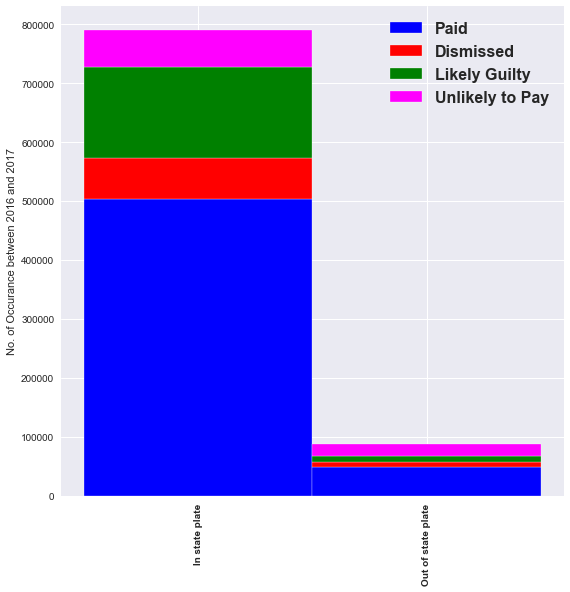

In [15]:
from matplotlib import rc

plt.figure(figsize=(9,9))
plt.tick_params(labelbottom=True)
rc('font',weight = 'bold')
r = np.arange(2)
# bar width
BW = 1

plt.bar(r, count_by_state[:,0], color='blue', edgecolor='white', width=BW,label = 'Paid')
plt.bar(r, count_by_state[:,1], bottom=count_by_state[:,0], color='red', edgecolor='white', width=BW,label='Dismissed')
plt.bar(r, count_by_state[:,2], bottom=np.sum(count_by_state[:,0:2],axis = 1), color='green', edgecolor='white', width=BW,label='Likely Guilty')
plt.bar(r, count_by_state[:,3], bottom=np.sum(count_by_state[:,0:3],axis = 1), color='magenta', edgecolor='white', width=BW,label='Unlikely to Pay')

plt.xticks(r, ['In state plate','Out of state plate'], fontweight='bold',rotation='vertical')
#plt.xlabel("Violation Type (Top 20)")
plt.ylabel("No. of Occurance between 2016 and 2017")
plt.legend(fontsize = 16)
plt.show()

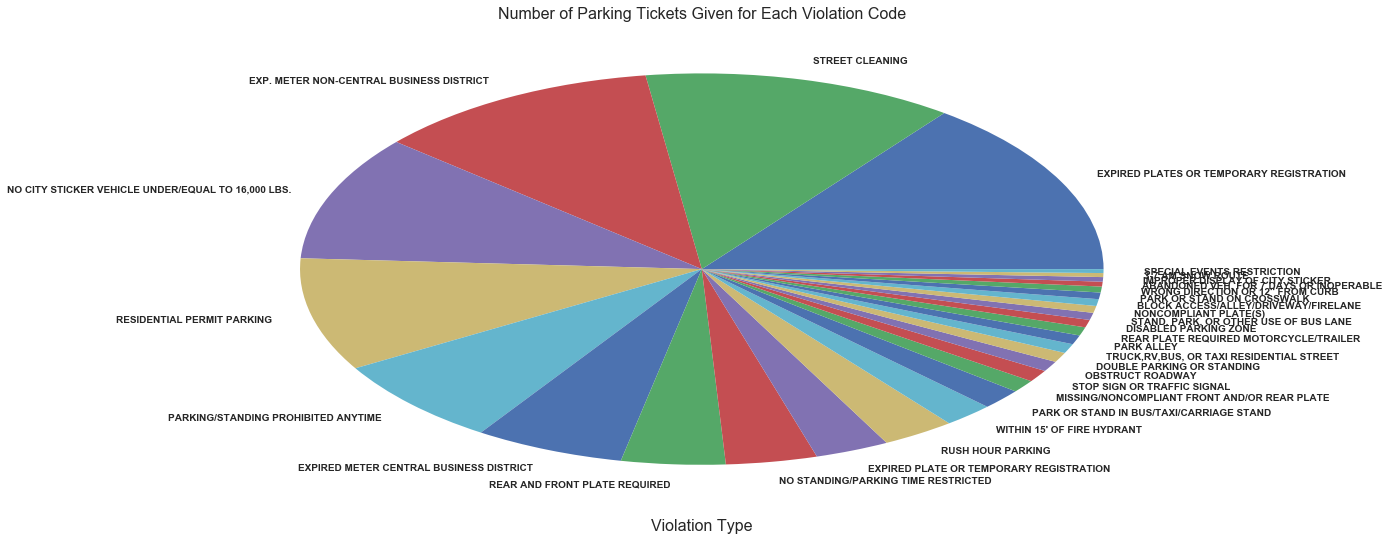

In [19]:
plt.figure(figsize=(18,9))
df_CCPT16['violation_description'].value_counts().head(30).plot(kind='pie')
#plt.tick_params(labelbottom='on')
plt.ylabel('', fontsize=16);
plt.xlabel('Violation Type', fontsize=16);
plt.title('Number of Parking Tickets Given for Each Violation Code', fontsize=16);
plt.show()

In [17]:
violation_type = df_CCPT16['violation_description'].value_counts().index
ticket_status = df_CCPT16['ticket_queue'].value_counts().index
# Here I categorize the ticket status in to 4:
# Paid, Dissmissed, Likely to be Guilty (Notice), Unlikely to pay (the rest: Define, Court, Bankrupcy,Hearing Req)
count_by_vt = np.zeros([20,4])

for vt_index in np.arange(20):
    mask = (df_CCPT16['violation_description'] == violation_type[vt_index])
    count_by_vt[vt_index,0] = np.count_nonzero(df_CCPT16.loc[mask]['ticket_queue'] == 'Paid')
    count_by_vt[vt_index,1] = np.count_nonzero(df_CCPT16.loc[mask]['ticket_queue'] == 'Dismissed')
    count_by_vt[vt_index,2] = np.count_nonzero(df_CCPT16.loc[mask]['ticket_queue'] == 'Notice') 
    count_by_vt[vt_index,3] = df_CCPT16.loc[mask]['ticket_queue'].size - np.sum(count_by_vt[vt_index,0:3])

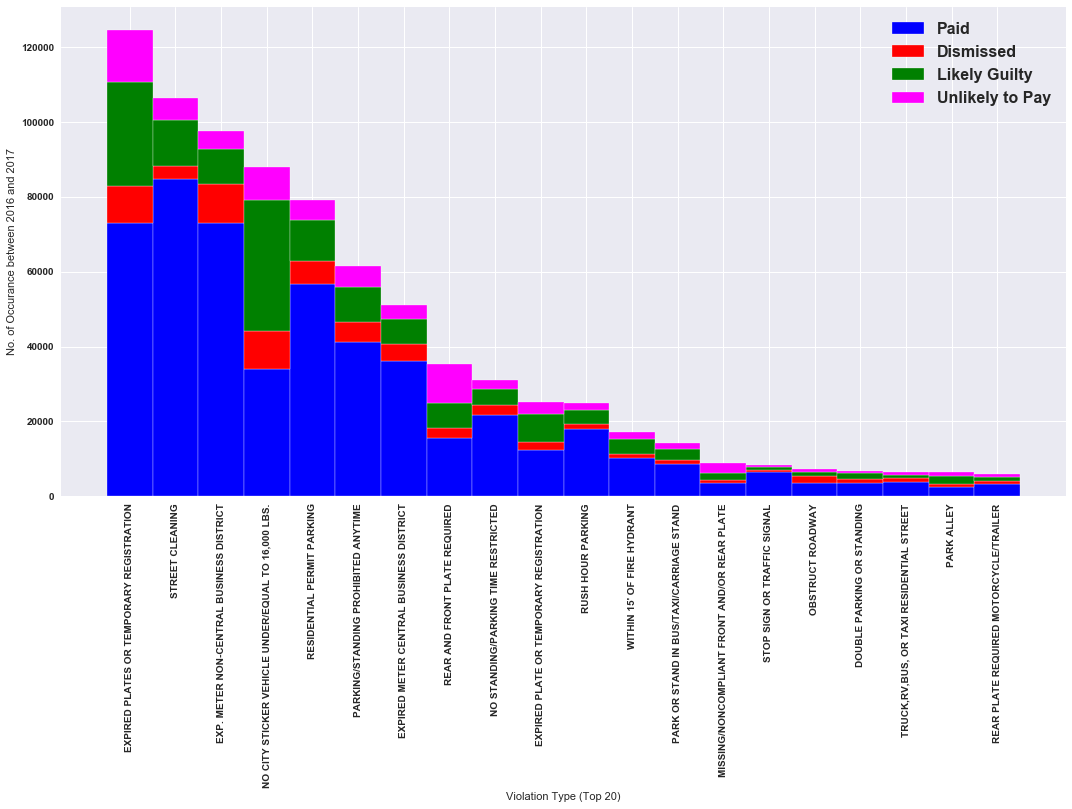

In [20]:
plt.figure(figsize=(18,9))
plt.tick_params(labelbottom=True)
rc('font',weight = 'bold')
r = np.arange(20)
# bar width
BW = 1

plt.bar(r, count_by_vt[:,0], color='blue', edgecolor='white', width=BW,label = 'Paid')
plt.bar(r, count_by_vt[:,1], bottom=count_by_vt[:,0], color='red', edgecolor='white', width=BW,label='Dismissed')
plt.bar(r, count_by_vt[:,2], bottom=np.sum(count_by_vt[:,0:2],axis = 1), color='green', edgecolor='white', width=BW,label='Likely Guilty')
plt.bar(r, count_by_vt[:,3], bottom=np.sum(count_by_vt[:,0:3],axis = 1), color='magenta', edgecolor='white', width=BW,label='Unlikely to Pay')

plt.xticks(r, violation_type[:20], fontweight='bold',rotation='vertical')
plt.xlabel("Violation Type (Top 20)")
plt.ylabel("No. of Occurance between 2016 and 2017")
plt.legend(fontsize = 16)
plt.show()

In [ ]:
hd = {'Unique Entry': df_CCPT.nunique(axis = 0),
        'Nan Entry': df_CCPT.isnull().any()}
pd.DataFrame(data = hd, index = df_CCPT16.columns.values)


In [21]:
fine_amount = df_CCPT16[['fine_level1_amount','fine_level2_amount','current_amount_due','total_payments']]

In [22]:
# fine_level2 is always twice the fine_level1, which makes it not helpful here
np.mean(fine_amount['fine_level2_amount']//fine_amount['fine_level1_amount'])

2.0

In [23]:
fine_amount['final_amount'] = fine_amount['current_amount_due'] + fine_amount['total_payments']
fine_amount['due_or_not'] = fine_amount['current_amount_due'] > 0

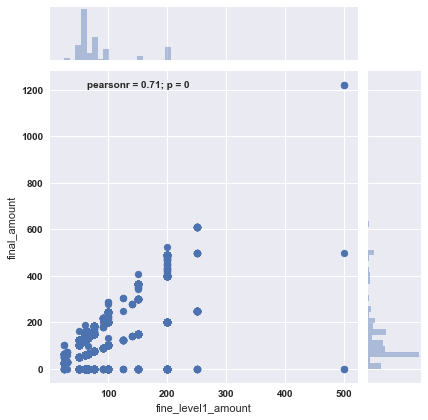

In [24]:
sns.set()
#ax = sns.scatterplot(x=fine_amount['fine_level1_amount'], y = fine_amount['final_amount'], hue=fine_amount['due_or_not'],data=tips)

ax = sns.jointplot(x = 'fine_level1_amount', y = 'final_amount',data=fine_amount[:10000])
plt.show()

In [25]:
fine_level = np.sort(df_CCPT16['fine_level1_amount'].unique())
fine_due_or_not = np.zeros([np.size(fine_level),2])

for fl_indx in np.arange(np.size(fine_level)):
    mask = (df_CCPT16['fine_level1_amount'] == fine_level[fl_indx])
    fine_due_or_not[fl_indx,0] = np.count_nonzero(df_CCPT16.loc[mask]['current_amount_due'] <= 0 ) # paid
    fine_due_or_not[fl_indx,1] = np.count_nonzero(df_CCPT16.loc[mask]['current_amount_due'] > 0 ) # due

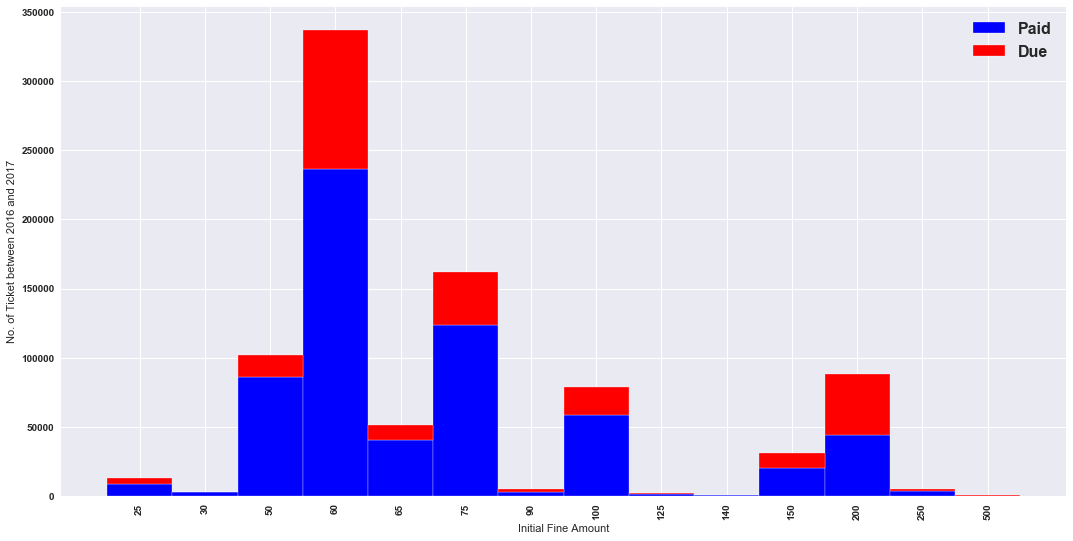

In [26]:
plt.figure(figsize=(18,9))
plt.tick_params(labelbottom=True)
rc('font',weight = 'bold')
r = np.arange(np.size(fine_level))
# bar width
BW = 1

plt.bar(r, fine_due_or_not[:,0], color='blue', edgecolor='white', width=BW,label = 'Paid')
plt.bar(r, fine_due_or_not[:,1], bottom=fine_due_or_not[:,0], color='red', edgecolor='white', width=BW,label='Due')

plt.xticks(r, fine_level, fontweight='bold',rotation='vertical')
plt.xlabel("Initial Fine Amount")
plt.ylabel("No. of Ticket between 2016 and 2017")
plt.legend(fontsize = 16)
plt.show()



In [ ]:
 np.sort(df_CCPT16['fine_level1_amount'].unique())

In [ ]:
df_CCPT16['address'].head()

In [27]:
address_df = pd.DataFrame(df_CCPT16['address'].str.split(', ').tolist(), columns=['address','city','state','None'])
#adderss_df.drop(columns = 'None',inplace = True)

In [28]:
address_df.head()

,address,city,state,None
0,500 e 46,chicago,il,None
1,6100 s archer ave,chicago,il,None
2,4200 w irving park,chicago,il,None
3,1700 w grand,chicago,il,None
4,2200 n st louis,chicago,il,None


In [29]:
address_df['city'].value_counts()

chicago    878695
louis           1
Name: city, dtype: int64

In [32]:
mask = (address_df['city']=='louis')
address_df.loc[mask]

,address,city,state,None
135412,600 n st,louis,chicago,il


In [33]:
# found anomoly here, change it
mask_add = (df_CCPT16['address'] == '600 n st, louis, chicago, il')
# I know this looks ugly, I haven't found a better way :(
df_CCPT16['address'] = df_CCPT16['address'].str.replace('600 n st, louis, chicago, il','600 n st louis, chicago, il')

In [34]:
df_CCPT16.loc[mask_add]['address']

871103    600 n st louis, chicago, il
Name: address, dtype: object

In [35]:
address_df = pd.DataFrame(df_CCPT16['address'].str.split(', ').tolist(), columns=['address','city','state'])

In [36]:
address_df['city'].value_counts()
# now the address should have been cleaned

chicago    878696
Name: city, dtype: int64

In [ ]:
address_df['state'].unique()
print('Number of unique addresses: {}'.format(len(address_df['address'].unique())))

In [ ]:
address_df = pd.DataFrame(address_df['address'].unique(), columns=['address'])
address_df['lat'] = np.nan
address_df['lng'] = np.nan
address_df.head()

In [ ]:
import geocoder
import requests
import time

In [ ]:
class GeoSessions:
    def __init__(self):
        self.Arcgis = requests.Session()
        self.Komoot = requests.Session()
        self.USCensus = requests.Session()
        self.OSM = requests.Session()

def create_sessions():
    return GeoSessions()

def geocode_address(address, s):
    g = geocoder.komoot(address, session=s.Komoot)
    if (g.ok == False):        
        g = geocoder.osm(address, session=s.OSM)
    if (g.ok == False):
        g = geocoder.arcgis(address, session=s.Arcgis)
    if (g.ok == False):
        g = geocoder.uscensus(address, session=s.USCensus)
    return g

In [ ]:
s = create_sessions()


In [ ]:
addr = address_df['address'][0] + ', Chicago, IL'
tmp = geocode_address(addr, s)
print(addr)
print('Latitude:  {}'.format(tmp.lat))
print('Longitude: {}'.format(tmp.lng))

In [ ]:
failed_inds = []
iter_between_saves = 100

In [ ]:
missing_latlon_ind = address_df[address_df['lat'].isnull()][:60001].index.tolist()

for i in missing_latlon_ind:
    try:
        if i%iter_between_saves == 0:
            print('reached index {}, saving df'.format(i))
            address_df.to_csv('CCPT_frac_1617.csv', index=False)
        addr = address_df['address'][i] + ', Chicago, IL'
        tmp = geocode_address(addr, s)
        address_df.loc[i,'lat'] = tmp.lat
        address_df.loc[i,'lng'] = tmp.lng
    except Exception as e:
        failed_inds.append(i)
address_df.to_csv('CCPT_frac_1617.csv', index=False)

In [ ]:
address_df[address_df['lat'].isnull()]

In [37]:
# load the presaved df for geocoded df
df_geoloc = pd.read_csv('../data/Geocoded_CCPT_1617.csv')
df_geoloc['address'] = df_geoloc['address'] + ', chicago, il'


In [38]:
geocoded_df = pd.merge(left=df_CCPT16, right=df_geoloc, how='inner', on='address')
geocoded_df.head()

,issue_date,license_plate_state,license_plate_type,violation_code,violation_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,officer,address,lat,lng
0,2016-05-19 17:40:00,IL,PAS,0976160A,REAR AND FRONT PLATE REQUIRED,LNDR,60,120,60.0,0.0,Define,2016-05-25 00:00:00,NaN,NaN,05238,"500 e 46, chicago, il",41.834909,-87.614170
1,2016-01-30 00:34:00,IL,TMP,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,CHRY,60,120,146.4,0.0,Notice,2016-02-11 00:00:00,FINL,NaN,10109,"500 e 46, chicago, il",41.834909,-87.614170
2,2016-11-05 20:35:00,IL,PAS,0964100C,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,HOND,150,300,0.0,150.0,Paid,2016-11-15 00:00:00,NaN,NaN,5121,"6100 s archer ave, chicago, il",41.794587,-87.770287
3,2016-05-27 17:30:00,IL,PAS,0964050J,DISABLED PARKING ZONE,FORD,250,500,0.0,250.0,Paid,2016-06-07 00:00:00,NaN,NaN,5652,"6100 s archer ave, chicago, il",41.794587,-87.770287
4,2017-11-24 16:23:00,IL,PAS,0964100C,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,DODG,150,300,300.0,0.0,Notice,2017-12-21 00:00:00,FINL,NaN,5652,"6100 s archer ave, chicago, il",41.794587,-87.770287


In [39]:
mask_chi = ((geocoded_df['lat']>=41.63) & (geocoded_df['lat']<= 42.05) &
               (geocoded_df['lng']>= -88.0) & (geocoded_df['lng']<= -87.5))

geocoded_df = geocoded_df.loc[mask_chi]

In [ ]:
import folium
import folium.plugins as plugins

#from folium.plugins import HeatMap

In [ ]:
chicago_lat = 41.8
chicago_lng = -87.7

In [ ]:
df_permit = geocoded_df.loc[geocoded_df['violation_description'] == 'RESIDENTIAL PERMIT PARKING']
df_permit.head()
#df_CCPT16['issue_date'].groupby(df_CCPT16['issue_date'].dt.hour).count().plot(kind='bar')

In [ ]:
df_permit_hm = df_permit[['lat','lng']]

In [ ]:
# There are quite some outliers, here I will just remove the ones outside Chicago, 
# later I will do the more careful cleaning

mask_chi = ((df_permit['lat']>=41.63) & (df_permit['lat']<= 42.05) &
               (df_permit['lng']>= -88.0) & (df_permit['lng']<= -87.5))
df_permit_hm = df_permit_hm.loc[mask_chi]

In [ ]:
permit_data = [[row['lat'],row['lng']] for index, row in df_permit_hm.iterrows()]

In [ ]:
np.size(permit_data)

In [ ]:
m = folium.Map([chicago_lat,chicago_lng],  tiles = "Stamen Toner",zoom_start=10)
hm = plugins.HeatMap(permit_data,radius = 9)
hm.add_to(m)
m

In [ ]:
df_permit['Weight'] = df_permit['issue_date'].dt.hour
df_permit['Weight'] = df_permit['Weight'].astype(float)
df_permit_hmt = df_permit[['lat','lng','Weight']]

In [ ]:
permit_timeseries = [[[row['lat'],row['lng']] 
                           for index, row in df_permit_hmt[df_permit_hmt['Weight'] == i].iterrows()] for i in range(0,24)]

In [ ]:
hours_indx = [(datetime.time(i).strftime('%I %p')) for i in range(24)]
mt = folium.Map([chicago_lat,chicago_lng],tiles = "Stamen Toner",zoom_start=10)
hmt = plugins.HeatMapWithTime(permit_timeseries,auto_play=True,radius = 5, min_opacity = 1,index = hours_indx)
hmt.add_to(mt)
mt

In [ ]:
plt.figure(figsize=(16,8))
df_permit['issue_date'].groupby(df_permit['issue_date'].dt.hour).count().plot(kind='bar')
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('Day Time', fontsize=16);
plt.title('Parking ticket issued at different time of the day', fontsize=16);


In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
geocoded_df.head()

,issue_date,license_plate_state,license_plate_type,violation_code,violation_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,officer,address,lat,lng
0,2016-05-19 17:40:00,IL,PAS,0976160A,REAR AND FRONT PLATE REQUIRED,LNDR,60,120,60.0,0.0,Define,2016-05-25 00:00:00,NaN,NaN,05238,"500 e 46, chicago, il",41.834909,-87.614170
1,2016-01-30 00:34:00,IL,TMP,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,CHRY,60,120,146.4,0.0,Notice,2016-02-11 00:00:00,FINL,NaN,10109,"500 e 46, chicago, il",41.834909,-87.614170
2,2016-11-05 20:35:00,IL,PAS,0964100C,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,HOND,150,300,0.0,150.0,Paid,2016-11-15 00:00:00,NaN,NaN,5121,"6100 s archer ave, chicago, il",41.794587,-87.770287
3,2016-05-27 17:30:00,IL,PAS,0964050J,DISABLED PARKING ZONE,FORD,250,500,0.0,250.0,Paid,2016-06-07 00:00:00,NaN,NaN,5652,"6100 s archer ave, chicago, il",41.794587,-87.770287
4,2017-11-24 16:23:00,IL,PAS,0964100C,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,DODG,150,300,300.0,0.0,Notice,2017-12-21 00:00:00,FINL,NaN,5652,"6100 s archer ave, chicago, il",41.794587,-87.770287


In [41]:
to_drop = ['fine_level2_amount','current_amount_due','total_payments',
          'ticket_queue_date','notice_level','hearing_disposition','address']
geocoded_df.drop(labels=to_drop ,axis = 1,inplace = True)

In [43]:
hd = {'Unique Entry': geocoded_df.nunique(axis = 0),
        'Nan Entry': geocoded_df.isnull().any()}
pd.DataFrame(data = hd, index = geocoded_df.columns.values)

,Unique Entry,Nan Entry
issue_date,486704,False
license_plate_state,62,False
license_plate_type,132,False
violation_code,111,False
violation_description,112,False
vehicle_make,149,False
fine_level1_amount,14,False
ticket_queue,7,False
officer,10530,False
lat,14753,False


In [44]:
geocoded_df['ticket_queue'].value_counts()

Paid           533709
Notice         157280
Dismissed       72936
Define          71239
Bankruptcy       9229
Court             537
Hearing Req        61
Name: ticket_queue, dtype: int64

In [45]:
geocoded_df['Outcome'] = np.nan
geocoded_df['Outcome'] = geocoded_df['ticket_queue'].map( {'Paid': 0, 'Dismissed': 1, 'Notice': 2,'Define':3,'Bankruptcy':3,'Court':3,'Hearing Req':3} ).astype(int)
#geocoded_df.loc[geocoded_df['ticket_queue']=='Court']

In [46]:
wd = {'Month':geocoded_df['issue_date'].dt.month,
      'Weekday': geocoded_df['issue_date'].dt.weekday,
      'Hour': geocoded_df['issue_date'].dt.hour}
df_date = pd.DataFrame(data = wd, index = geocoded_df.index)

In [47]:
df_ml = pd.concat([geocoded_df,df_date],axis=1)

In [48]:
df_ml.head()

,issue_date,license_plate_state,license_plate_type,violation_code,violation_description,vehicle_make,fine_level1_amount,ticket_queue,officer,lat,lng,Outcome,Month,Weekday,Hour
0,2016-05-19 17:40:00,IL,PAS,0976160A,REAR AND FRONT PLATE REQUIRED,LNDR,60,Define,05238,41.834909,-87.614170,3,5,3,17
1,2016-01-30 00:34:00,IL,TMP,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,CHRY,60,Notice,10109,41.834909,-87.614170,2,1,5,0
2,2016-11-05 20:35:00,IL,PAS,0964100C,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,HOND,150,Paid,5121,41.794587,-87.770287,0,11,5,20
3,2016-05-27 17:30:00,IL,PAS,0964050J,DISABLED PARKING ZONE,FORD,250,Paid,5652,41.794587,-87.770287,0,5,4,17
4,2017-11-24 16:23:00,IL,PAS,0964100C,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,DODG,150,Notice,5652,41.794587,-87.770287,2,11,4,16


In [49]:
mask_in_state = (df_ml['license_plate_state'] == 'IL')
df_ml['Plate_State'] = np.zeros(df_ml['license_plate_state'].count()).astype(int)
df_ml.loc[mask_in_state,'Plate_State'] = np.ones(df_ml.loc[mask_in_state]['Plate_State'].count()).astype(int)

In [56]:
df_ml['license_plate_type'].value_counts().head(20)

PAS    728753
TRK     40702
TMP     33151
OTH     25072
TXI      9464
DLC      4484
FFM      3365
Name: license_plate_type, dtype: int64

In [51]:
mask_plate_type = df_ml['license_plate_type'].isin(['PAS','TRK','TMP','TXI','DLC','FFM'])
df_ml.loc[~mask_plate_type,'license_plate_type'] = 'OTH'

In [58]:
df_ml.loc[~mask_plate_type].head()

,issue_date,license_plate_state,license_plate_type,violation_code,violation_description,vehicle_make,fine_level1_amount,ticket_queue,officer,lat,lng,Outcome,Month,Weekday,Hour,Plate_State
163,2016-03-02 13:52:00,IL,OTH,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,TOYT,50,Paid,805,41.857914,-87.663931,0,3,2,13,1
204,2016-01-25 13:25:00,IL,OTH,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,HYUN,60,Paid,800,41.857914,-87.663931,0,1,0,13,1
239,2017-09-13 18:35:00,IL,OTH,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,CHEV,50,Define,1606,41.857914,-87.663931,3,9,2,18,1
252,2017-06-30 20:34:00,IL,OTH,0976160A,REAR AND FRONT PLATE REQUIRED,JEEP,60,Paid,1623,41.857914,-87.663931,0,6,4,20,1
272,2016-09-07 20:05:00,IL,OTH,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,VESP,60,Paid,1565,41.857914,-87.663931,0,9,2,20,1


In [59]:
df_ml['license_plate_type'].value_counts().head()

PAS    728753
TRK     40702
TMP     33151
OTH     25072
TXI      9464
Name: license_plate_type, dtype: int64

In [60]:
df_ml['vehicle_make'].value_counts().head()

CHEV    106423
FORD     88955
TOYT     88396
HOND     70864
NISS     65097
Name: vehicle_make, dtype: int64

In [61]:
violation_type = df_ml['violation_description'].value_counts().index
mask_vio_type = df_ml['violation_description'].isin(violation_type[:25])
df_ml.loc[~mask_vio_type,'violation_description'] = 'OTHER'

In [ ]:
df_ml.loc[~mask_vio_type]

In [62]:
 df_ml['violation_description'].value_counts()

EXPIRED PLATES OR TEMPORARY REGISTRATION              119408
STREET CLEANING                                       102610
EXP. METER NON-CENTRAL BUSINESS DISTRICT               95059
NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.     84112
RESIDENTIAL PERMIT PARKING                             75478
PARKING/STANDING PROHIBITED ANYTIME                    58473
OTHER                                                  50396
EXPIRED METER CENTRAL BUSINESS DISTRICT                49918
REAR AND FRONT PLATE REQUIRED                          34080
NO STANDING/PARKING TIME RESTRICTED                    29234
RUSH HOUR PARKING                                      24371
EXPIRED PLATE OR TEMPORARY REGISTRATION                24236
WITHIN 15' OF FIRE HYDRANT                             16463
PARK OR STAND IN BUS/TAXI/CARRIAGE STAND               13678
MISSING/NONCOMPLIANT FRONT AND/OR REAR PLATE            8434
STOP SIGN OR TRAFFIC SIGNAL                             8131
OBSTRUCT ROADWAY        

In [63]:
hd = {'Unique Entry': df_ml.nunique(axis = 0),
        'Nan Entry': df_ml.isnull().any()}
pd.DataFrame(data = hd, index = df_ml.columns.values)

,Unique Entry,Nan Entry
issue_date,486704,False
license_plate_state,62,False
license_plate_type,7,False
violation_code,111,False
violation_description,25,False
vehicle_make,149,False
fine_level1_amount,14,False
ticket_queue,7,False
officer,10530,False
lat,14753,False


In [64]:
to_drop = ['issue_date','license_plate_state','violation_code','ticket_queue']
df_ml.drop(labels=to_drop ,axis = 1,inplace = True)

In [3]:
df_ml.columns

Index(['license_plate_type', 'violation_description', 'vehicle_make',
       'fine_level1_amount', 'officer', 'lat', 'lng', 'Outcome', 'Month',
       'Weekday', 'Hour', 'Plate_State'],
      dtype='object')

In [28]:
df_ml.Outcome.value_counts()

0    533709
2    157280
3     81066
1     72936
Name: Outcome, dtype: int64

In [186]:
#df_ml.to_csv('CCPT_ML.csv', index=False)

In [2]:
df_ml = pd.read_csv('./CCPT_ML.csv')

In [3]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [30]:
h2o.cluster().shutdown()

In [15]:
#data = h2o.import_file('CCPT_ML.csv')

#h2o.connect()

h2o.init(ip='localhost',max_mem_size = '32G',min_mem_size = '20G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /Users/chaogao/anaconda/h2o_jar/h2o.jar
  Ice root: /var/folders/qy/8ph9blss7658wd26ypypv6jh0000gn/T/tmpef9quid5
  JVM stdout: /var/folders/qy/8ph9blss7658wd26ypypv6jh0000gn/T/tmpef9quid5/h2o_chaogao_started_from_python.out
  JVM stderr: /var/folders/qy/8ph9blss7658wd26ypypv6jh0000gn/T/tmpef9quid5/h2o_chaogao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,8 months and 4 days !!!
H2O cluster name:,H2O_from_python_chaogao_ruy9hq
H2O cluster total nodes:,1
H2O cluster free memory:,28.44 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [16]:
h2o.remove_all()

In [17]:
h2o.ls()

,key


In [18]:
hf_ml = h2o.H2OFrame(df_ml)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [19]:
hf_ml.head()

license_plate_type,violation_description,vehicle_make,fine_level1_amount,officer,lat,lng,Outcome,Month,Weekday,Hour,Plate_State
PAS,REAR AND FRONT PLATE REQUIRED,LNDR,60,5238,41.8349,-87.6142,3,5,3,17,1
TMP,EXPIRED PLATES OR TEMPORARY REGISTRATION,CHRY,60,10109,41.8349,-87.6142,2,1,5,0,1
PAS,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,HOND,150,5121,41.7946,-87.7703,0,11,5,20,1
PAS,DISABLED PARKING ZONE,FORD,250,5652,41.7946,-87.7703,0,5,4,17,1
PAS,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,DODG,150,5652,41.7946,-87.7703,2,11,4,16,1
PAS,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,FORD,150,18502,41.7946,-87.7703,0,4,0,18,1
PAS,PARK OR STAND IN BUS/TAXI/CARRIAGE STAND,JEEP,100,23932,41.9538,-87.7327,2,8,6,4,1
PAS,PARK OR STAND IN BUS/TAXI/CARRIAGE STAND,CHEV,100,6628,41.9538,-87.7327,2,4,5,2,1
PAS,PARKING/STANDING PROHIBITED ANYTIME,HOND,75,6628,41.9538,-87.7327,0,4,1,23,1
PAS,PARK OR STAND IN BUS/TAXI/CARRIAGE STAND,TOYT,100,23932,41.9538,-87.7327,0,7,5,15,1


In [20]:
hf_ml["license_plate_type"]= hf_ml["license_plate_type"].asfactor()
hf_ml["violation_description"]= hf_ml["violation_description"].asfactor()
#hf_ml["vehicle_make"]= hf_ml["vehicle_make"].asfactor()
hf_ml["Plate_State"]= hf_ml["Plate_State"].asfactor()
#hf_ml["Month"]= hf_ml["Month"].asfactor()
#hf_ml["Weekday"]= hf_ml["Weekday"].asfactor()
#hf_ml["Hour"]= hf_ml["Hour"].asfactor()
hf_ml["Outcome"]= hf_ml["Outcome"].asfactor()

In [21]:
#train, test = hf_ml.split_frame(ratios=[0.8])
train, valid, test = hf_ml.split_frame([0.6, 0.2], seed=1234)

In [22]:
train_col = ['license_plate_type','violation_description','fine_level1_amount',
             'Plate_State','Month', 'Weekday', 'Hour']
response_col = 'Outcome'

In [102]:
model = H2ORandomForestEstimator(ntrees=100, max_depth=20, nfolds=10)

In [103]:
model.train(x=train_col, y=response_col, training_frame=train, validation_frame = valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [106]:
# Model performance
performance = model.model_performance(test_data=test)

print(performance)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.3149106919137782
RMSE: 0.5611690404091962
LogLoss: 0.9342263977905264
Mean Per-Class Error: 0.6643708418420311
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,3,Error,Rate
101790.0,650.0,3466.0,1038.0,0.0481934,"5,154 / 106,944"
11547.0,1453.0,1063.0,299.0,0.8988302,"12,909 / 14,362"
25062.0,196.0,5379.0,560.0,0.8275796,"25,818 / 31,197"
12481.0,90.0,1714.0,1895.0,0.8828801,"14,285 / 16,180"
150880.0,2389.0,11622.0,3792.0,0.3448243,"58,166 / 168,683"


Top-4 Hit Ratios: 


k,hit_ratio
1,0.6551757
2,0.8486984
3,0.9423712
4,1.0


In [104]:
model.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2018-11-08 15:44:45,16 min 10.654 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2018-11-08 15:44:45,16 min 11.283 sec,1.0,0.571816,2.237315,0.360508,0.570851,2.229023,0.359606
2,,2018-11-08 15:44:46,16 min 12.027 sec,2.0,0.571121,2.149894,0.359905,0.565474,1.377158,0.353774
3,,2018-11-08 15:44:47,16 min 12.888 sec,3.0,0.570347,2.024643,0.359136,0.563952,1.160672,0.351851
4,,2018-11-08 15:44:48,16 min 13.845 sec,4.0,0.569093,1.850927,0.357942,0.563165,1.063868,0.350501
5,,2018-11-08 15:44:52,16 min 18.273 sec,10.0,0.565979,1.216633,0.353381,0.562346,0.948963,0.347346
6,,2018-11-08 15:45:01,16 min 27.317 sec,22.0,0.563846,0.977828,0.349761,0.561867,0.938362,0.345800
7,,2018-11-08 15:45:21,16 min 46.788 sec,48.0,0.563064,0.945372,0.348269,0.561542,0.935340,0.345735
8,,2018-11-08 15:46:01,17 min 26.560 sec,100.0,0.562760,0.940694,0.347618,0.561449,0.934557,0.345262


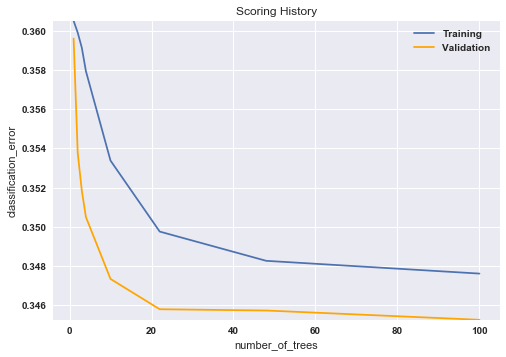

In [105]:
model.plot()

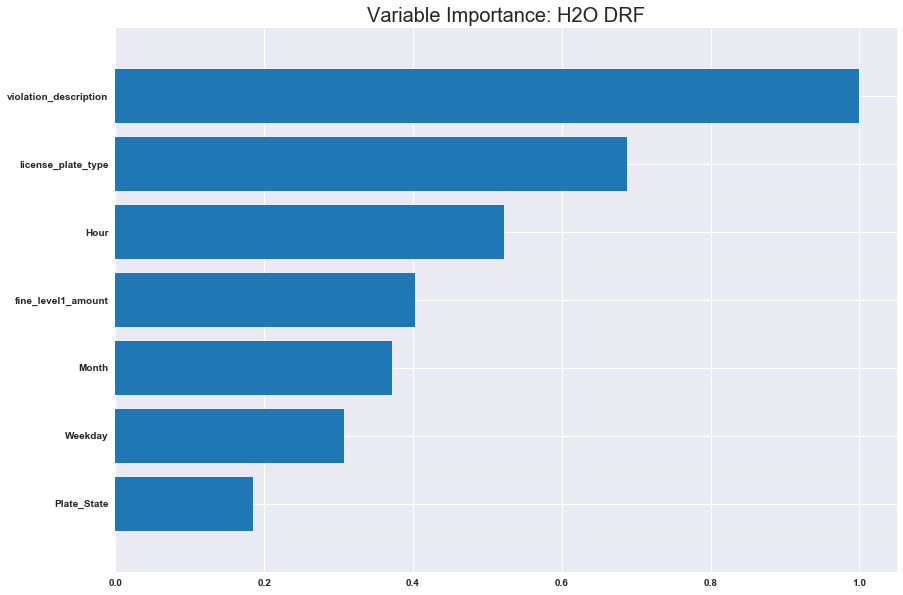

In [107]:
model.varimp_plot()

In [109]:
# save the model
model_path = h2o.save_model(model=model, path="../model", force=True)

print(model_path)

# load the model
#saved_model = h2o.load_model(model_path)

/Users/chaogao/Documents/Python_course/CCPT/model/DRF_model_python_1541703477744_5


In [110]:
hf_ml.summary()

,license_plate_type,violation_description,vehicle_make,fine_level1_amount,officer,lat,lng,Outcome,Month,Weekday,Hour,Plate_State
type,enum,enum,enum,int,int,real,real,enum,enum,enum,enum,enum
mins,,,,25.0,0.0,41.644110999999995,-87.997822,,,,,
mean,,,,83.70345956347458,4984.380911572525,41.88128872057646,-87.66941363724943,,,,,
maxs,,,,500.0,99883.0,42.048927,-87.52483510192856,,,,,
sigma,,,,47.38545309559593,6383.079945766539,0.07661662540889354,0.05355833876899383,,,,,
zeros,,,,0,4,0,0,,,,,
missing,0,0,0,0,1328,0,0,0,0,0,0,0
0,PAS,REAR AND FRONT PLATE REQUIRED,LNDR,60.0,5238.0,41.83490870000001,-87.61417004242811,3,5,3,17,1
1,TMP,EXPIRED PLATES OR TEMPORARY REGISTRATION,CHRY,60.0,10109.0,41.83490870000001,-87.61417004242811,2,1,5,0,1
2,PAS,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,HOND,150.0,5121.0,41.7945873494539,-87.77028650039058,0,11,5,20,1


In [23]:
train_col = ['license_plate_type','violation_description','fine_level1_amount',
             'Plate_State','Month', 'Weekday', 'Hour']
response_col = 'Outcome'

In [24]:
RF_v2 = H2ORandomForestEstimator(ntrees=100, max_depth=20, nfolds=10,categorical_encoding = 'SortByResponse')

In [25]:
RF_v2.train(x=train_col, y=response_col, training_frame=train, validation_frame = valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [26]:
# Model performance
performance = RF_v2.model_performance(test_data=test)

print(performance)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.3172807508987705
RMSE: 0.56327679776356
LogLoss: 0.9496083166712825
Mean Per-Class Error: 0.660904778212057
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,3,Error,Rate
100189.0,843.0,4165.0,1747.0,0.0631639,"6,755 / 106,944"
11259.0,1488.0,1170.0,445.0,0.8963933,"12,874 / 14,362"
24658.0,248.0,5412.0,879.0,0.8265218,"25,785 / 31,197"
11942.0,175.0,1758.0,2305.0,0.8575402,"13,875 / 16,180"
148048.0,2754.0,12505.0,5376.0,0.3514818,"59,289 / 168,683"


Top-4 Hit Ratios: 


k,hit_ratio
1,0.6485182
2,0.8439084
3,0.9401895
4,0.9999999


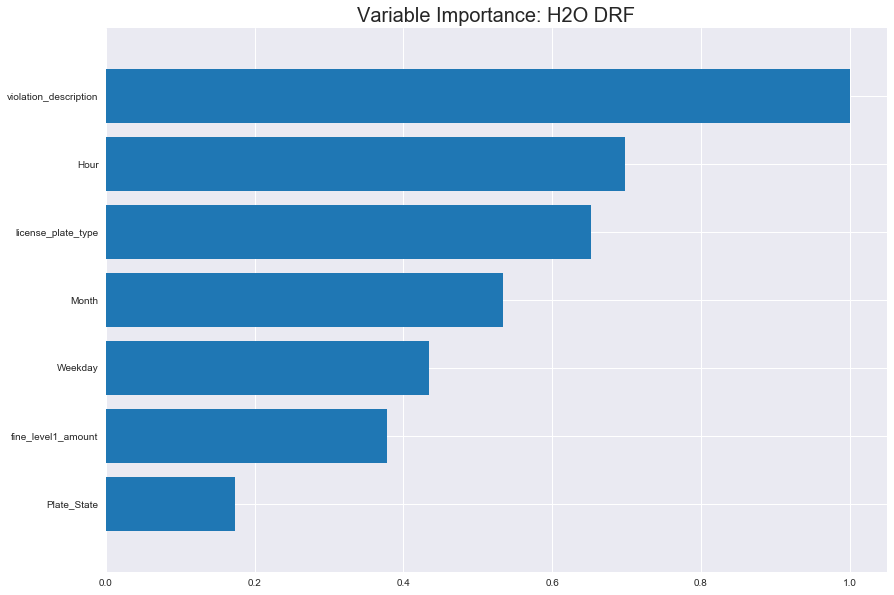

In [29]:
RF_v2.varimp_plot()

In [ ]:
# save the model
model_path = h2o.save_model(model=RF_V2, path="../model", force=True)

print(model_path)